Enter the path of your file: /home/olivev13/GCST90134433_buildGRCh37 (1).tsv
Enter the output path of your file: /home/olivev13/teste
Enter the output file name: teste1
Hooray we found your file!
Tue Jan 31 19:34:17 2023 Start to load format from formatbook....
Tue Jan 31 19:34:17 2023  -plink format meta info:
Tue Jan 31 19:34:17 2023   - format_name  : .assoc, .assoc.fisher, .assoc.linear, .assoc.logistic, .assoc.dosage
Tue Jan 31 19:34:17 2023   - format_source  : https://www.cog-genomics.org/plink/1.9/
Tue Jan 31 19:34:17 2023   - format_version  : Stable (beta 6.26, 2 Apr)
Tue Jan 31 19:34:17 2023   - format_citation  : Purcell, S., Neale, B., Todd-Brown, K., Thomas, L., Ferreira, M. A., Bender, D., ... & Sham, P. C. (2007). PLINK: a tool set for whole-genome association and population-based linkage analyses. The American journal of human genetics, 81(3), 559-575.
Tue Jan 31 19:34:17 2023  -plink format dictionary:
Tue Jan 31 19:34:17 2023   - plink keys: SNP,CHR,BP,A2,A1,BETA,OR,

Tue Jan 31 19:34:54 2023 Finished creating Manhattan plot successfully!
Tue Jan 31 19:34:54 2023  -Skip annotating
Tue Jan 31 19:34:54 2023 Start to create QQ plot with 43 variants:
Tue Jan 31 19:34:54 2023  -Calculating lambda GC: 0.8846790292410175
Tue Jan 31 19:34:54 2023 Finished creating QQ plot successfully!
Tue Jan 31 19:34:54 2023 Saving plot:
Tue Jan 31 19:34:54 2023  -Saved to /home/olivev13/teste/teste12.pdf successfully!
Tue Jan 31 19:34:54 2023 Start to plot manhattan/qq plot with the following basic settings:
Tue Jan 31 19:34:54 2023  -Genome-wide significance level is set to 5e-08 ...
Tue Jan 31 19:34:54 2023  -Raw input contains 100000 variants...
Tue Jan 31 19:34:54 2023  -Plot layout mode is : r
Tue Jan 31 19:34:54 2023  -Region to plot : chr7:156538803-157538803.
Tue Jan 31 19:34:54 2023  -Extract SNPs in region : chr7:156538803-157538803...
Tue Jan 31 19:34:55 2023  -Extract SNPs in specified regions: 43
Tue Jan 31 19:34:55 2023 Finished loading specified columns fr

(<Figure size 3000x2000 with 3 Axes>, <gwaslab.Log.Log at 0x7f331eb18f40>)

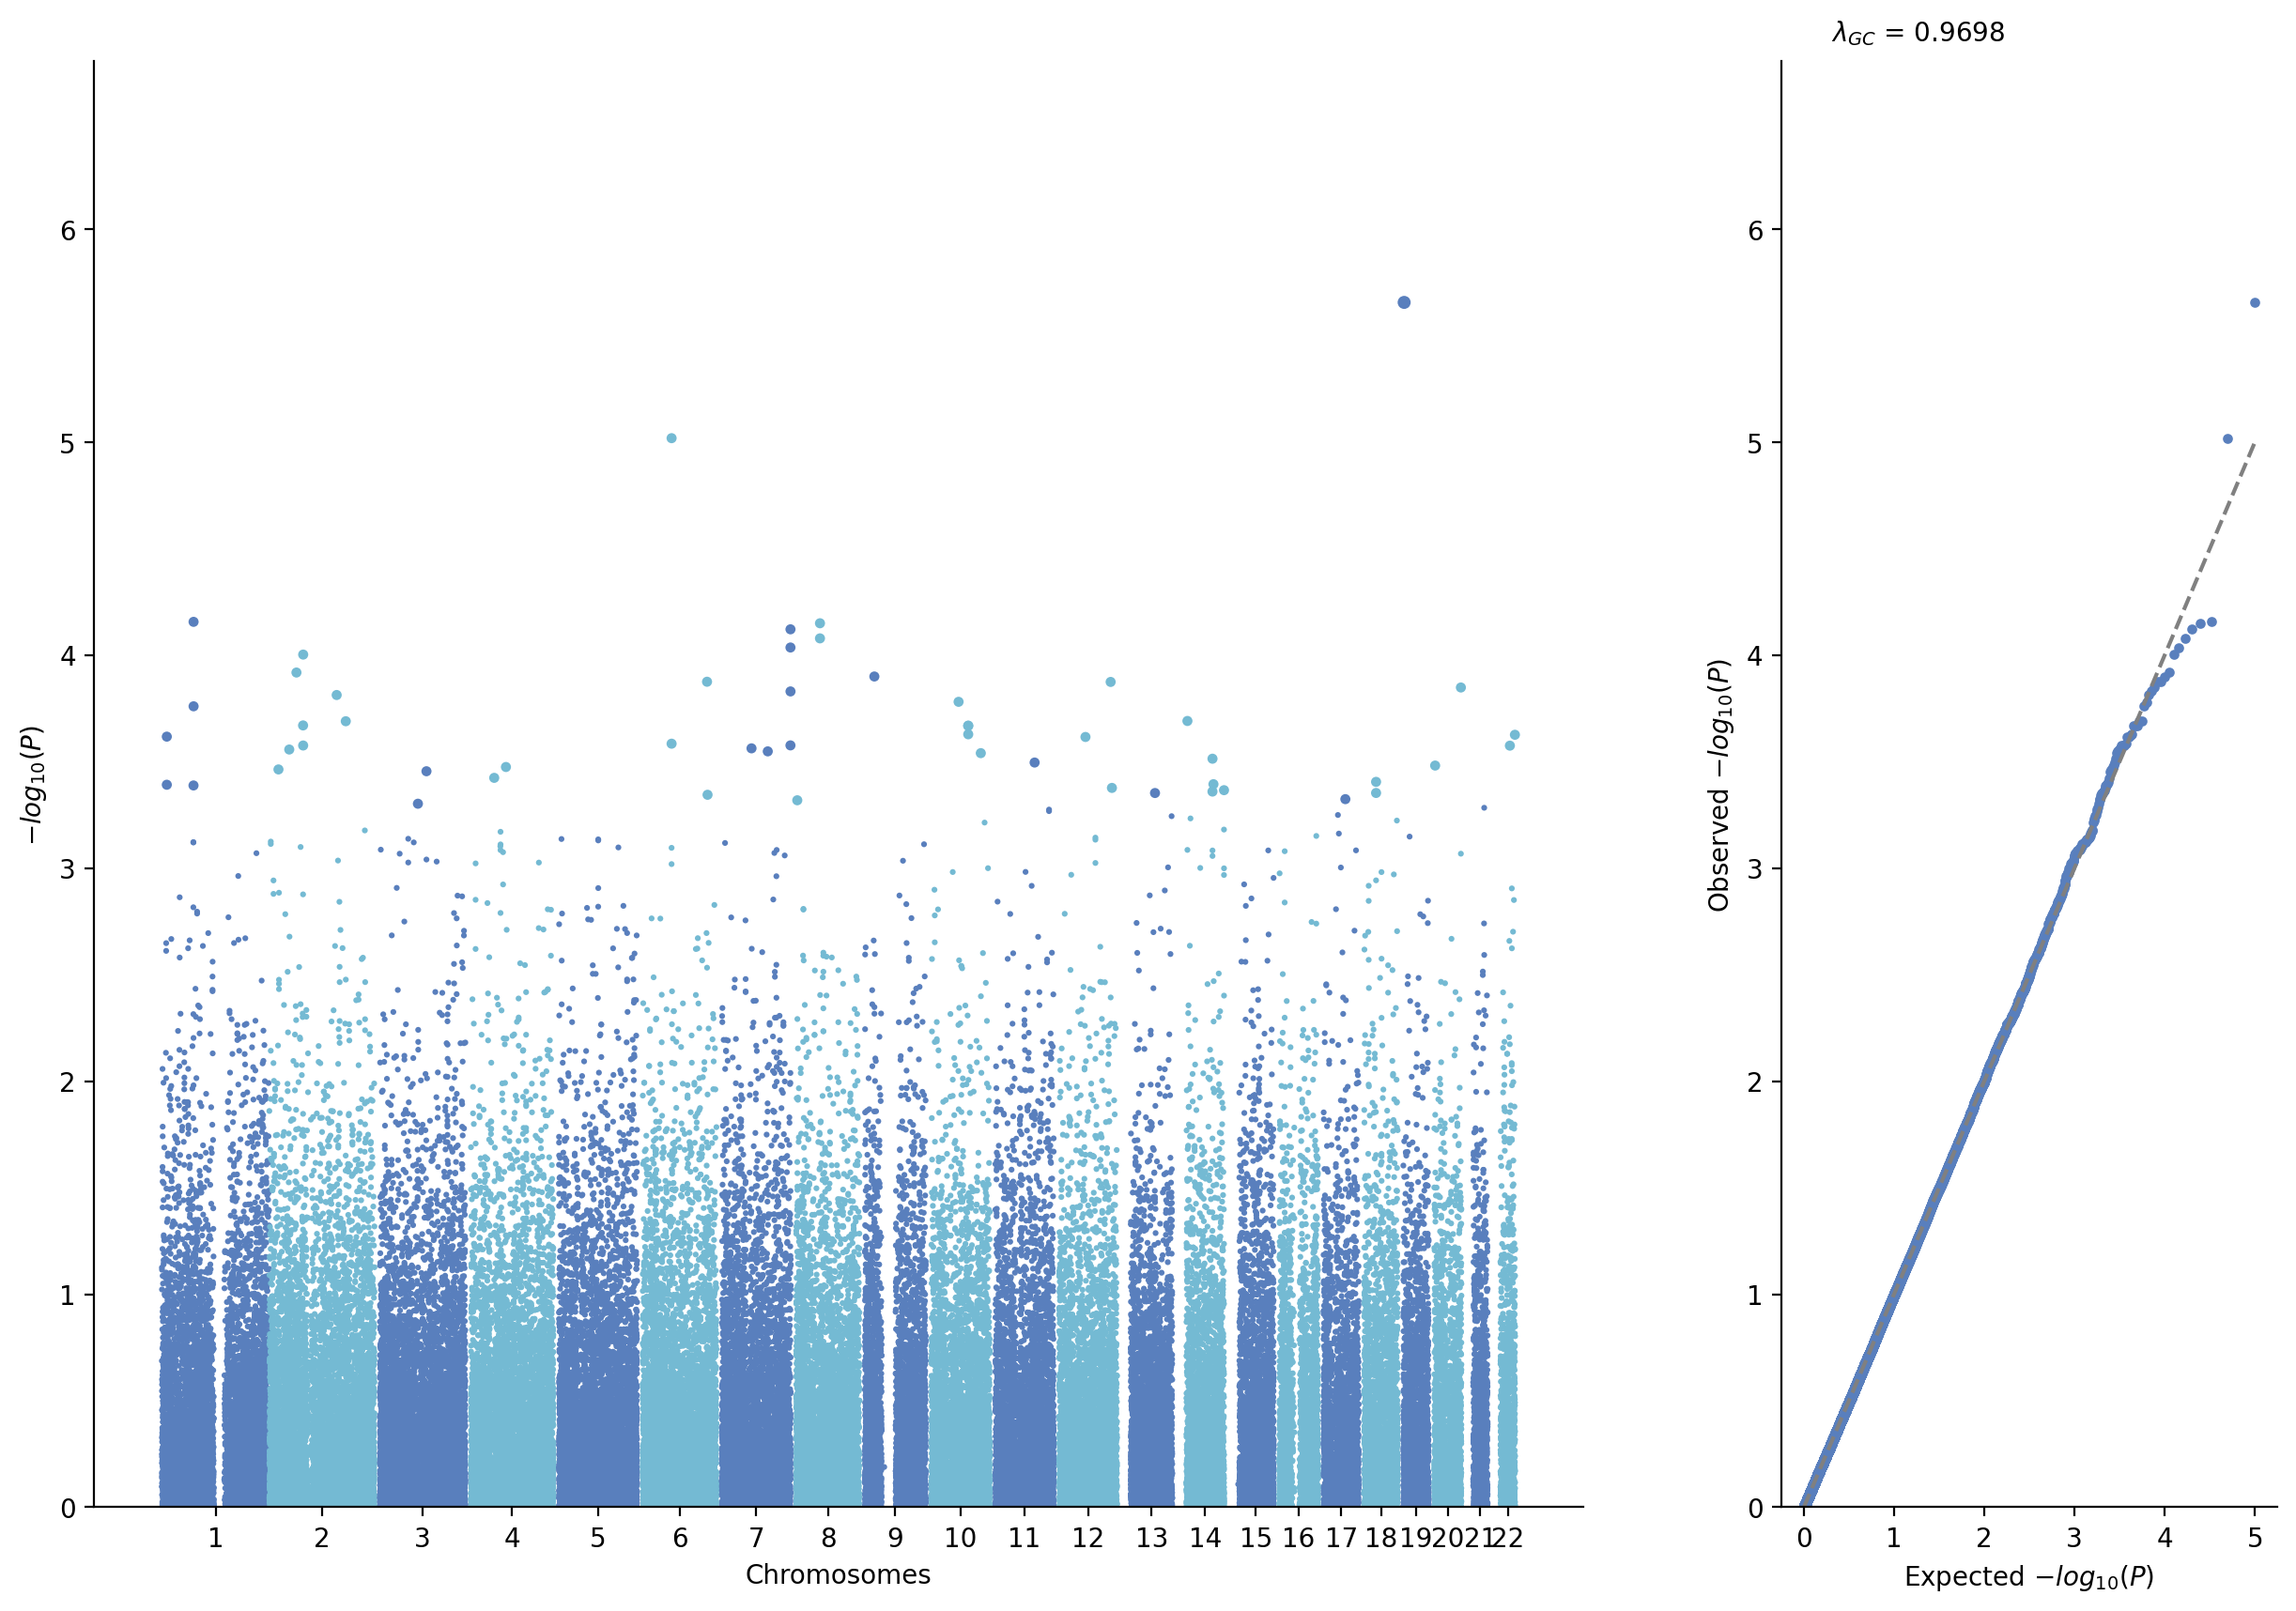

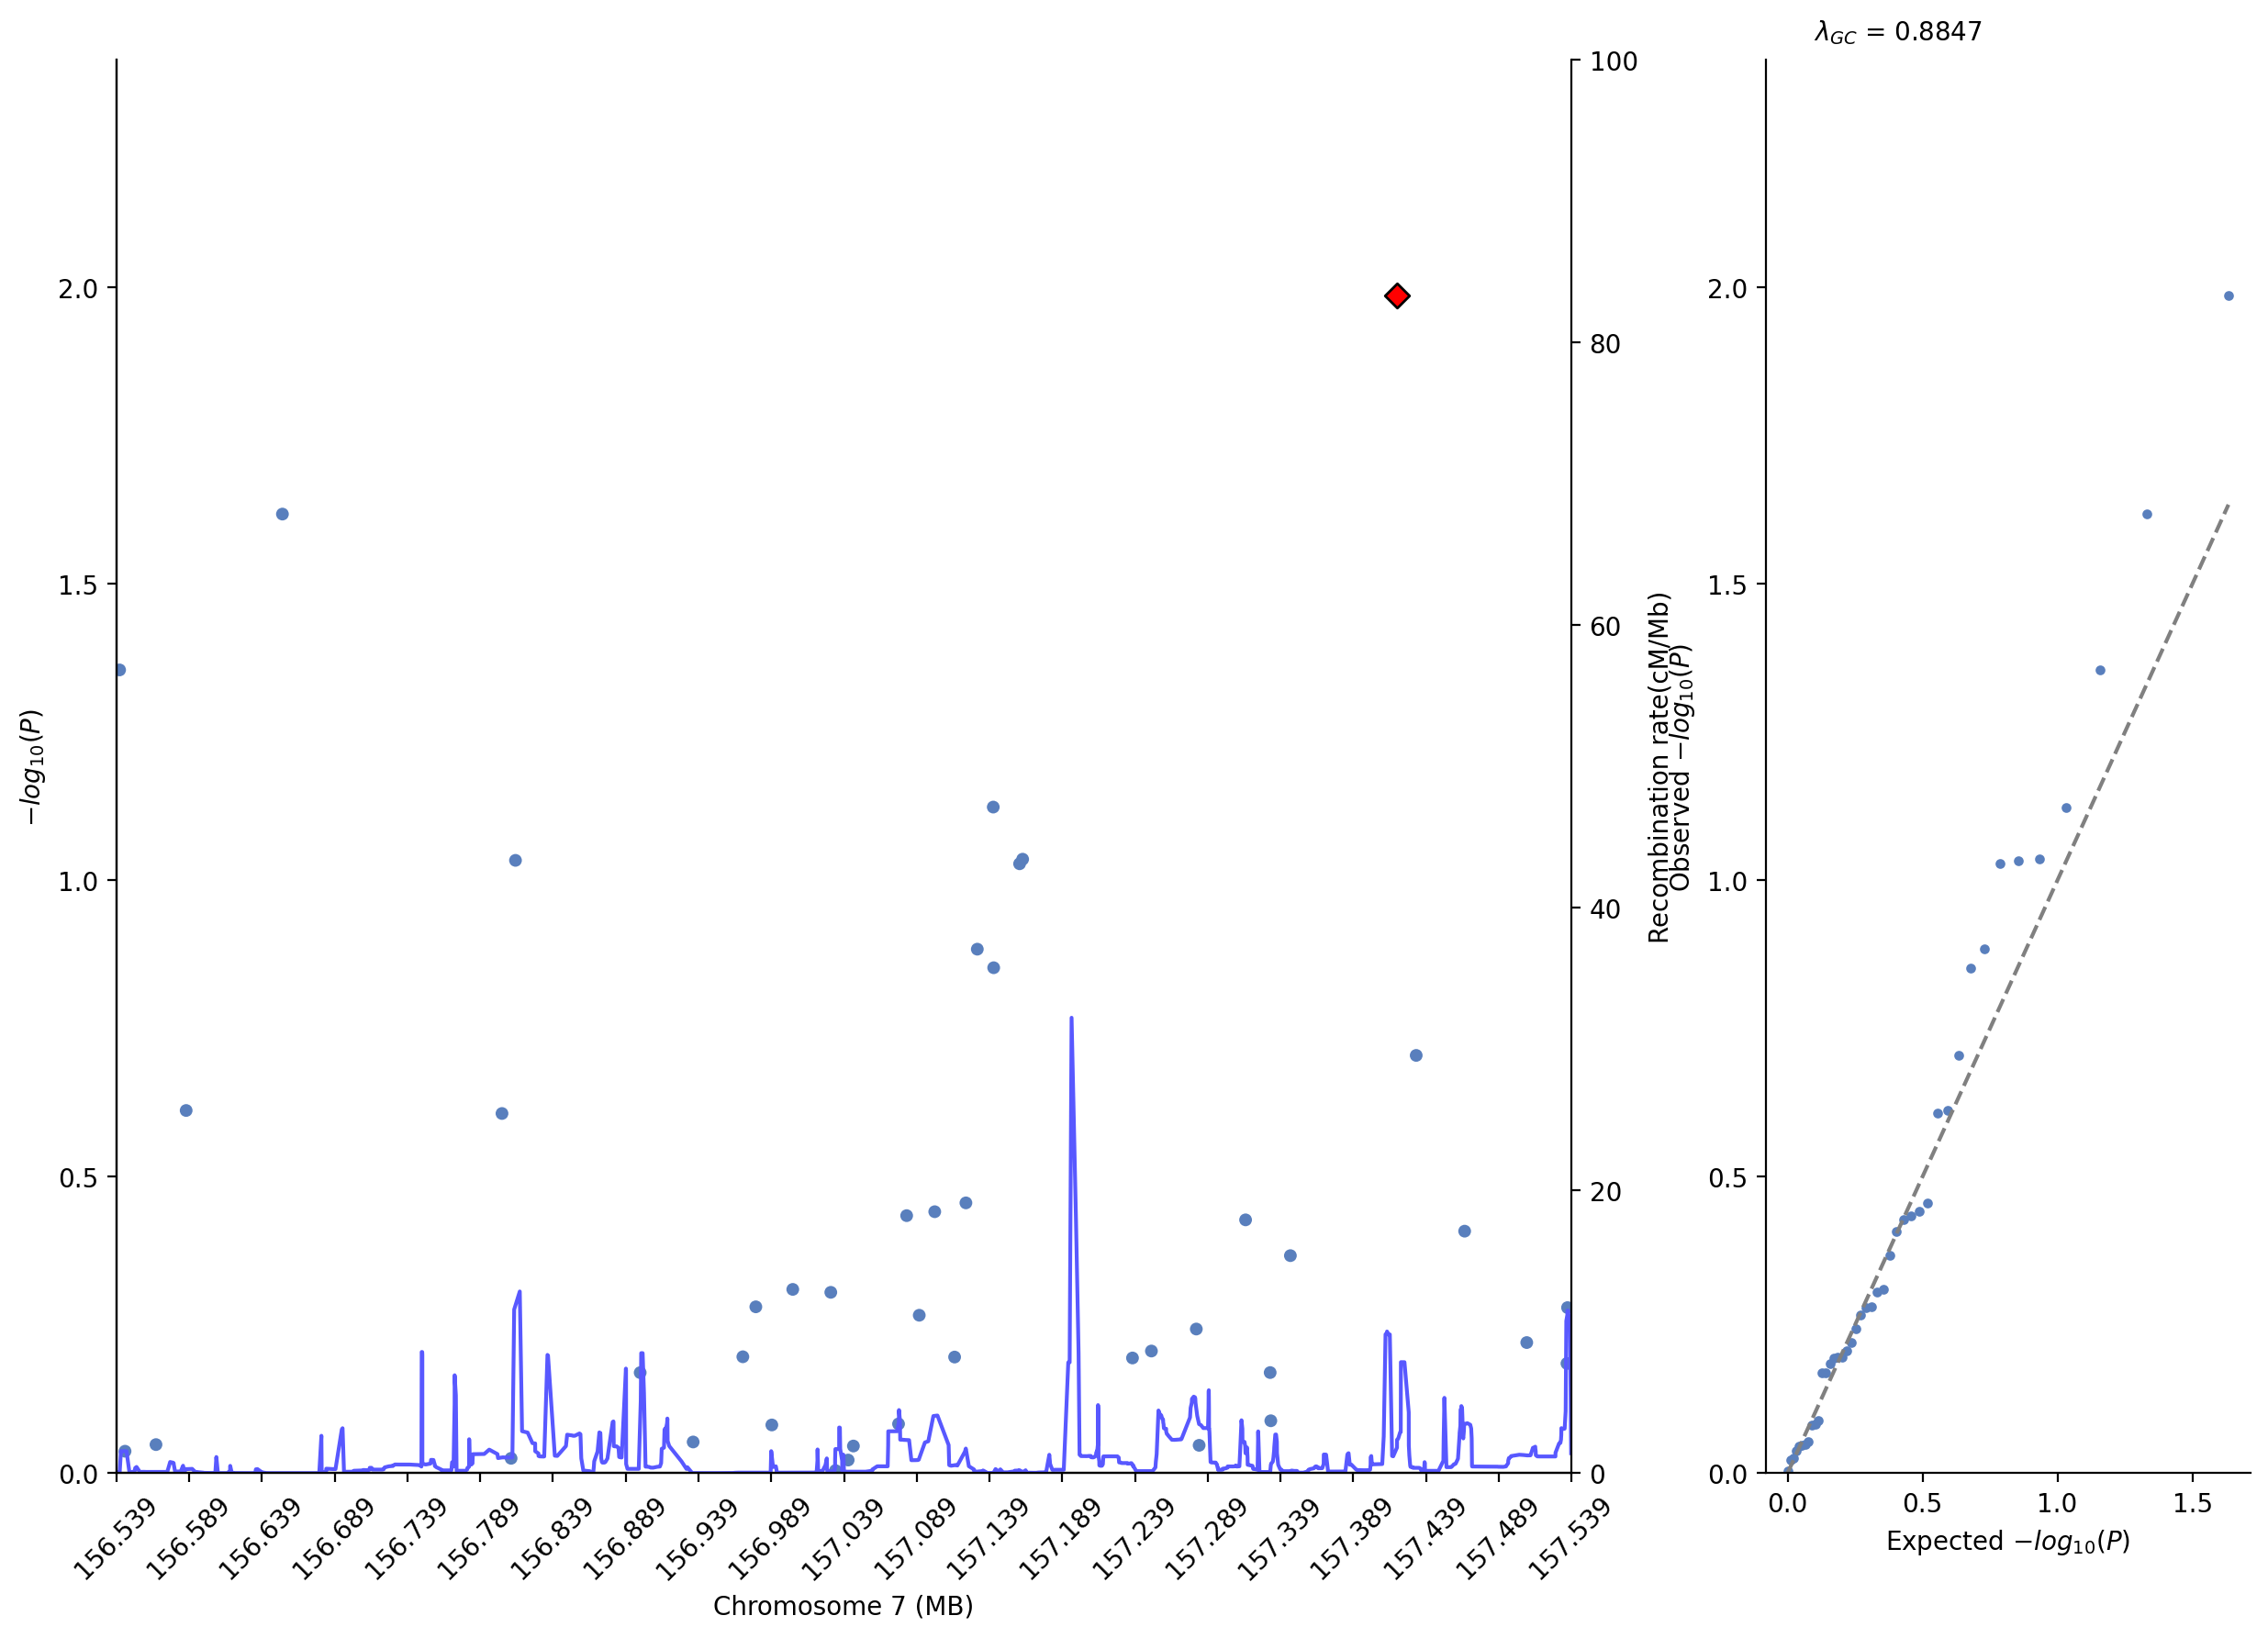

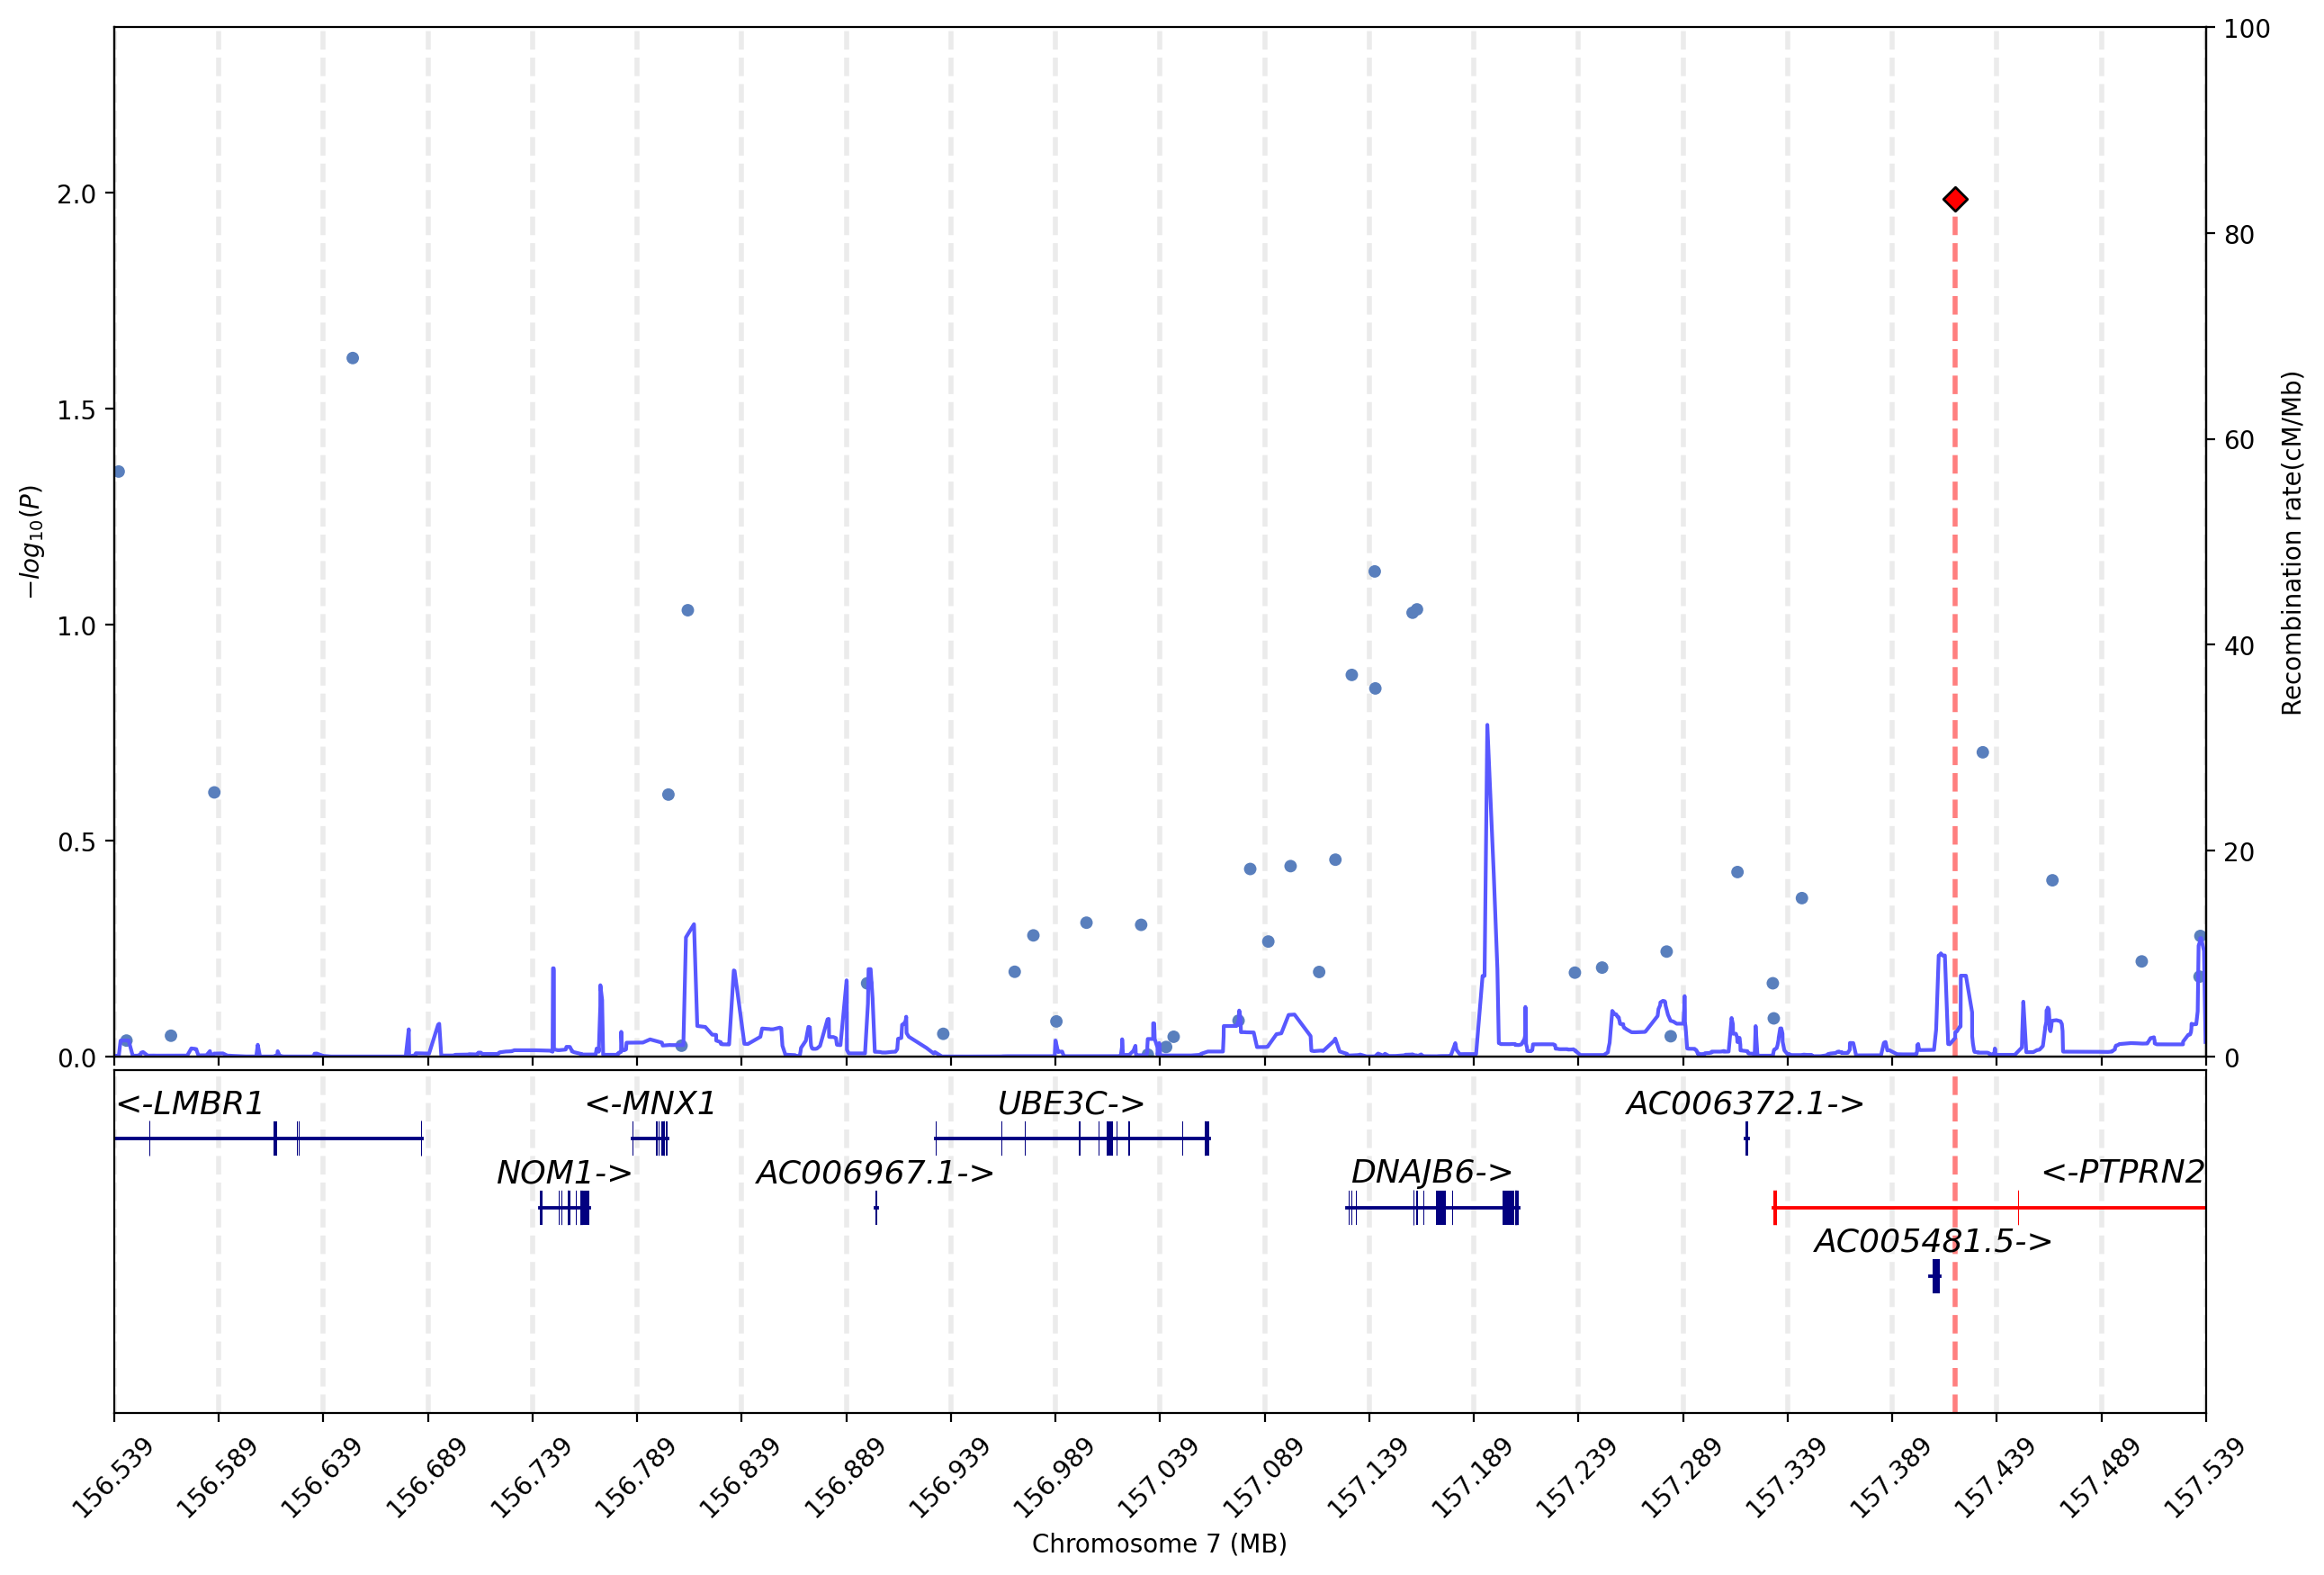

In [27]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import gwaslab as gl
import pandas as pd
import sys
import os

user_input = input("Enter the path of your file: ")
user_output = input("Enter the output path of your file: ")  
input_file_name = input ("Enter the output file name: ")

assert os.path.exists(user_input), "I did not find the file at, "+str(user_input)
assert os.path.exists(user_output), "This output path did not exist "+str(user_output)
f = pd.read_csv(user_input, sep="\t",nrows=100000)
print("Hooray we found your file!")

mysumstats = gl.Sumstats(user_input,
                           fmt="plink",
             snpid="variant_id",
             rsid=None,
             chrom="chromosome",
             pos="base_pair_location",
             ea="effect_allele",
             nea="other_allele",
             ref=None,
             alt=None,
             eaf=None,
             neaf=None,
             n=None,
             beta="beta",
             se="standard_error",
             chisq=None,
             z=None,
             p="p_value",
             mlog10p=None,
             info=None,
             OR="odds_ratio",
             OR_95L=None,
             OR_95U=None,
             status=None,
             other=[],
             direction=None,
             verbose=True,
             build="99"
            )

mysumstats.random_variants(n=100000,inplace=True)
mysumstats.basic_check()
mysumstats.infer_build()
mysumstats.lookup_status()


user_output2 = user_output + '/' + input_file_name + '.pdf'
mysumstats.plot_mqq(save= user_output2,saveargs={"dpi":400,"facecolor":"white"})
mysumstats.get_lead()
user_output3 = user_output + '/' + input_file_name + '2' + '.pdf'
mysumstats.plot_mqq(save= user_output3,region=(7,156538803,157538803))
user_output4 = user_output + '/' + input_file_name + '3' + '.pdf'
mysumstats.plot_mqq(save= user_output4, mode="r", region=(7,156538803,157538803),region_grid=True, gtf_path="ensembl")

